# How Elon Musk affects the Crpytocurrency market

**In this Data Analysis Project I am going to be looking at Elon Musks Tweets from 2018 and 2021 alongside trading data for the cryptocurrency Bitcoin and Ethereum.**
1) Investigating the Impact of Elon Musk's Tweets on Cryptocurrency Prices The primary objective of this research is to analyse the influence of Elon Musk's tweets on the prices of two major cryptocurrencies, Bitcoin and Ethereum. By conducting sentiment analysis on Musk's tweets, we aim to ascertain whether his social media activity correlates with significant price fluctuations in these cryptocurrencies.

2) Developing Accurate Price Prediction Models for Bitcoin and Ethereum Another crucial objective of this study is to employ diverse machine learning algorithms to create robust and accurate predictive models for Bitcoin and Ethereum prices. By utilizing historical cryptocurrency data and sentiment analysis results from Elon Musk's tweets, we aim to construct reliable models that can forecast future price movements with increased precision.

3) Applying Natural Language Processing (NLP) for Sentiment Analysis A key focus of this research is to implement sophisticated Natural Language Processing (NLP) techniques to analyse the sentiment conveyed in Elon Musk's tweets regarding Bitcoin and Ethereum. The objective is to quantitatively measure the sentiment's impact on market dynamics, offering valuable insights into the relationship between social media sentiment and cryptocurrency price movements.

In [1]:


import numpy as np 
import pandas as pd 

pd.options.mode.chained_assignment = None

import seaborn as sns
import matplotlib.pyplot as plt


import os



# 1. Reading and Cleaning Tweet Data

In [2]:
_2010 = pd.read_csv('C:/Users/shahe/Desktop/FYP/tweetselon/2010.csv')
_2011 = pd.read_csv('C:/Users/shahe/Desktop/FYP/tweetselon/2011.csv')
_2012 = pd.read_csv('C:/Users/shahe/Desktop/FYP/tweetselon/2012.csv')
_2013 = pd.read_csv('C:/Users/shahe/Desktop/FYP/tweetselon/2013.csv')
_2014 = pd.read_csv('C:/Users/shahe/Desktop/FYP/tweetselon/2014.csv')
_2015 = pd.read_csv('C:/Users/shahe/Desktop/FYP/tweetselon/2015.csv')
_2016 = pd.read_csv('C:/Users/shahe/Desktop/FYP/tweetselon/2016.csv')
_2017 = pd.read_csv('C:/Users/shahe/Desktop/FYP/tweetselon/2017.csv')
_2018 = pd.read_csv('C:/Users/shahe/Desktop/FYP/tweetselon/2018.csv')
_2019 = pd.read_csv('C:/Users/shahe/Desktop/FYP/tweetselon/2019.csv')
_2020 = pd.read_csv('C:/Users/shahe/Desktop/FYP/tweetselon/2020.csv')
_2021 = pd.read_csv('C:/Users/shahe/Desktop/FYP/tweetselon/2021.csv')

In [3]:
tweets = pd.concat([_2010, _2011, _2012, _2013, _2014, _2015, _2016, _2017, _2018, _2019, _2020, _2021], axis = 0)

In [4]:
tweets.head()

Unnamed: 0                  id     conversation_id       created_at  \
0         0.0         15434727182         15434727182  1275676317000.0   
0         0.0  152153637639028736  152151847614943233  1325111228000.0   
1         1.0  151809315026636800  151809315026636800  1325029135000.0   
2         2.0  151338939389706242  151338939389706242  1324916990000.0   
3         3.0  151337237429239808  151337237429239808  1324916584000.0   

                  date  timezone  place  \
0  2010-06-04 18:31:57         0    NaN   
0  2011-12-28 22:27:08         0    NaN   
1  2011-12-27 23:38:55         0    NaN   
2  2011-12-26 16:29:50         0    NaN   
3  2011-12-26 16:23:04         0    NaN   

                                               tweet language hashtags  ...  \
0  Please ignore prior tweets, as that was someon...       en       []  ...   
0                               @TheOnion So true :)       en       []  ...   
1  If you ever wanted to know the *real* truth ab...       en       []  ...   
2  Walked around a neighborhood recently rebuilt ...       en       []  ...   
3  It was Xmas, so we brought presents for the ki...       en       []  ...   

  reply_to  retweet_date  translate trans_src trans_dest  time  mentions  \
0       []           NaN        NaN       NaN        NaN   NaN       NaN   
0       []           NaN        NaN       NaN        NaN   NaN       NaN   
1       []           NaN        NaN       NaN        NaN   NaN       NaN   
2       []           NaN        NaN       NaN        NaN   NaN       NaN   
3       []           NaN        NaN       NaN        NaN   NaN       NaN   

  replies_count retweets_count likes_count  
0           NaN            NaN         NaN  
0           NaN            NaN         NaN  
1           NaN            NaN         NaN  
2           NaN            NaN         NaN  
3           NaN            NaN         NaN  

[5 rows x 44 columns]

In [5]:
tweets = tweets.reset_index(drop=True)
tweets

Unnamed: 0                   id      conversation_id  \
0             0.0          15434727182          15434727182   
1             0.0   152153637639028736   152151847614943233   
2             1.0   151809315026636800   151809315026636800   
3             2.0   151338939389706242   151338939389706242   
4             3.0   151337237429239808   151337237429239808   
...           ...                  ...                  ...   
33845         NaN  1345384139969552389  1345382294966571008   
33846         NaN  1345382294966571008  1345382294966571008   
33847         NaN  1345344958710992897  1345334831719337984   
33848         NaN  1345208391958888448  1344675033231237120   
33849         NaN  1344810193952014336  1344518758707113986   

                                      created_at                 date  \
0                                1275676317000.0  2010-06-04 18:31:57   
1                                1325111228000.0  2011-12-28 22:27:08   
2                                1325029135000.0  2011-12-27 23:38:55   
3                                1324916990000.0  2011-12-26 16:29:50   
4                                1324916584000.0  2011-12-26 16:23:04   
...                                          ...                  ...   
33845  2021-01-02 18:59:09 Arabian Standard Time           2021-01-02   
33846  2021-01-02 18:51:49 Arabian Standard Time           2021-01-02   
33847  2021-01-02 16:23:28 Arabian Standard Time           2021-01-02   
33848  2021-01-02 07:20:48 Arabian Standard Time           2021-01-02   
33849  2021-01-01 04:58:30 Arabian Standard Time           2021-01-01   

       timezone  place                                              tweet  \
0             0    NaN  Please ignore prior tweets, as that was someon...   
1             0    NaN                               @TheOnion So true :)   
2             0    NaN  If you ever wanted to know the *real* truth ab...   
3             0    NaN  Walked around a neighborhood recently rebuilt ...   
4             0    NaN  It was Xmas, so we brought presents for the ki...   
...         ...    ...                                                ...   
33845       400    NaN  @flcnhvy Tesla is responsible for 2/3 of all t...   
33846       400    NaN  So proud of the Tesla team for achieving this ...   
33847       400    NaN  @newscientist Um, we have giant fusion reactor...   
33848       400    NaN  @comma_ai Tesla Full Self-Driving will work at...   
33849       400    NaN  @PPathole Dojo isn’t needed, but will make sel...   

      language hashtags  ...  \
0           en       []  ...   
1           en       []  ...   
2           en       []  ...   
3           en       []  ...   
4           en       []  ...   
...        ...      ...  ...   
33845       en       []  ...   
33846       en       []  ...   
33847       en       []  ...   
33848       en       []  ...   
33849       en       []  ...   

                                                reply_to  retweet_date  \
0                                                     []           NaN   
1                                                     []           NaN   
2                                                     []           NaN   
3                                                     []           NaN   
4                                                     []           NaN   
...                                                  ...           ...   
33845  [{'screen_name': 'flcnhvy', 'name': 'Viv ✶', '...           NaN   
33846                                                 []           NaN   
33847  [{'screen_name': 'newscientist', 'name': 'New ...           NaN   
33848  [{'screen_name': 'comma_ai', 'name': 'comma', ...           NaN   
33849  [{'screen_name': 'PPathole', 'name': 'Pranay P...           NaN   

       translate trans_src trans_dest      time  mentions replies_count  \
0            NaN       NaN        NaN       NaN       NaN           NaN   
1            NaN       N

In [6]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33850 entries, 0 to 33849
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30735 non-null  float64
 1   id               33850 non-null  int64  
 2   conversation_id  33850 non-null  int64  
 3   created_at       33850 non-null  object 
 4   date             33850 non-null  object 
 5   timezone         33850 non-null  int64  
 6   place            0 non-null      float64
 7   tweet            33850 non-null  object 
 8   language         33850 non-null  object 
 9   hashtags         33850 non-null  object 
 10  cashtags         33850 non-null  object 
 11  user_id          33850 non-null  int64  
 12  user_id_str      30735 non-null  float64
 13  username         33850 non-null  object 
 14  name             33850 non-null  object 
 15  day              30735 non-null  float64
 16  hour             30735 non-null  float64
 17  link        

In [7]:
tweets.describe()

Unnamed: 0            id  conversation_id      timezone  place  \
count  30735.00000  3.385000e+04     3.385000e+04  33850.000000    0.0   
mean    3719.88967  9.069845e+17     9.049764e+17     36.809453    NaN   
std     3229.30086  3.578022e+17     3.585009e+17    115.625432    NaN   
min        0.00000  1.543473e+10     1.659576e+09      0.000000    NaN   
25%      947.00000  7.015485e+17     6.995101e+17      0.000000    NaN   
50%     2609.00000  1.002381e+18     1.001313e+18      0.000000    NaN   
75%     6172.00000  1.162998e+18     1.161853e+18      0.000000    NaN   
max    11716.00000  1.476662e+18     1.476644e+18    400.000000    NaN   

          user_id  user_id_str           day          hour         video  ...  \
count     33850.0      30735.0  30735.000000  30735.000000  33850.000000  ...   
mean   44196397.0   44196397.0      4.123768     12.441321      0.066352  ...   
std           0.0          0.0      1.963727      7.769270      0.248899  ...   
min    44196397.0   44196397.0      1.000000      0.000000      0.000000  ...   
25%    44196397.0   44196397.0      2.000000      5.000000      0.000000  ...   
50%    44196397.0   44196397.0      4.000000     15.000000      0.000000  ...   
75%    44196397.0   44196397.0      6.000000     19.000000      0.000000  ...   
max    44196397.0   44196397.0      7.000000     23.000000      1.000000  ...   

       user_rt_id  user_rt  retweet_id  retweet_date  translate  trans_src  \
count         0.0      0.0         0.0           0.0        0.0        0.0   
mean          NaN      NaN         NaN           NaN        NaN        NaN   
std           NaN      NaN         NaN           NaN        NaN        NaN   
min           NaN      NaN         NaN           NaN        NaN        NaN   
25%           NaN      NaN         NaN           NaN        NaN        NaN   
50%           NaN      NaN         NaN           NaN        NaN        NaN   
75%           NaN      NaN         NaN           NaN        NaN        NaN   
max           NaN      NaN         NaN           NaN        NaN        NaN   

       trans_dest  replies_count  retweets_count    likes_count  
count         0.0    3115.000000     3115.000000    3115.000000  
mean          NaN    2984.214446     3986.073836   49304.263242  
std           NaN    7311.076200    11185.339213  104657.186986  
min           NaN       0.000000       21.000000     850.000000  
25%           NaN     310.000000      234.000000    4983.500000  
50%           NaN     602.000000      502.000000   10335.000000  
75%           NaN    1681.000000     1758.000000   32299.500000  
max           NaN  120523.000000   140044.000000  963257.000000  

[8 rows x 26 columns]

In [8]:
#only weant the tweets and the date
tweets = tweets[['date','tweet']]
tweets

date                                              tweet
0      2010-06-04 18:31:57  Please ignore prior tweets, as that was someon...
1      2011-12-28 22:27:08                               @TheOnion So true :)
2      2011-12-27 23:38:55  If you ever wanted to know the *real* truth ab...
3      2011-12-26 16:29:50  Walked around a neighborhood recently rebuilt ...
4      2011-12-26 16:23:04  It was Xmas, so we brought presents for the ki...
...                    ...                                                ...
33845           2021-01-02  @flcnhvy Tesla is responsible for 2/3 of all t...
33846           2021-01-02  So proud of the Tesla team for achieving this ...
33847           2021-01-02  @newscientist Um, we have giant fusion reactor...
33848           2021-01-02  @comma_ai Tesla Full Self-Driving will work at...
33849           2021-01-01  @PPathole Dojo isn’t needed, but will make sel...

[33850 rows x 2 columns]

In [9]:
#Lets clean up the date format
tweets.date = tweets.date.str[:10] #tweets.date.str[:10]
tweets

date                                              tweet
0      2010-06-04  Please ignore prior tweets, as that was someon...
1      2011-12-28                               @TheOnion So true :)
2      2011-12-27  If you ever wanted to know the *real* truth ab...
3      2011-12-26  Walked around a neighborhood recently rebuilt ...
4      2011-12-26  It was Xmas, so we brought presents for the ki...
...           ...                                                ...
33845  2021-01-02  @flcnhvy Tesla is responsible for 2/3 of all t...
33846  2021-01-02  So proud of the Tesla team for achieving this ...
33847  2021-01-02  @newscientist Um, we have giant fusion reactor...
33848  2021-01-02  @comma_ai Tesla Full Self-Driving will work at...
33849  2021-01-01  @PPathole Dojo isn’t needed, but will make sel...

[33850 rows x 2 columns]

In [10]:
#Lets clean the tweets (remove @'s' and urls and)
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
new = []
for t in tweets.tweet:
    words = t.split()
    t = t.split()
    t = ' '.join(word for word in t if not word.startswith('@'))
    t = t.split()
    t = ' '.join(word for word in t if not word.startswith('http'))
    new.append(t)
    
tweets['tweet'] = new
tweets

date                                              tweet
0      2010-06-04  Please ignore prior tweets, as that was someon...
1      2011-12-28                                         So true :)
2      2011-12-27  If you ever wanted to know the *real* truth ab...
3      2011-12-26  Walked around a neighborhood recently rebuilt ...
4      2011-12-26  It was Xmas, so we brought presents for the ki...
...           ...                                                ...
33845  2021-01-02  Tesla is responsible for 2/3 of all the person...
33846  2021-01-02  So proud of the Tesla team for achieving this ...
33847  2021-01-02  Um, we have giant fusion reactor in the sky th...
33848  2021-01-02  Tesla Full Self-Driving will work at a safety ...
33849  2021-01-01  Dojo isn’t needed, but will make self-driving ...

[33850 rows x 2 columns]

# 2. Finding BitCoin tweets

In [11]:
#Now Bitcoin
Bit = pd.DataFrame(columns = ['Date', 'Tweet'])

for i in range(len(tweets)):
    cur = tweets.loc[i].tweet
    cur = cur.lower()
    if 'bitcoin' in cur:
        Bit = Bit.append({'Date' : tweets.loc[i].date, 'Tweet' : tweets.loc[i].tweet}, 
                ignore_index = True)
    


Bit['Date'] = pd.to_datetime(Bit['Date'], format='%Y-%m-%d')
Bit

C:\Users\shahe\AppData\Local\Temp\ipykernel_25452\269290584.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Bit = Bit.append({'Date' : tweets.loc[i].date, 'Tweet' : tweets.loc[i].tweet},
C:\Users\shahe\AppData\Local\Temp\ipykernel_25452\269290584.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Bit = Bit.append({'Date' : tweets.loc[i].date, 'Tweet' : tweets.loc[i].tweet},
C:\Users\shahe\AppData\Local\Temp\ipykernel_25452\269290584.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Bit = Bit.append({'Date' : tweets.loc[i].date, 'Tweet' : tweets.loc[i].tweet},
C:\Users\shahe\AppData\Local\Temp\ipykernel_25452\269290584.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futu

Date                                              Tweet
0  2018-10-22                         Wanna buy some Bitcoin? 😉😉
1  2018-10-22                         Wanna buy some Bitcoin? 😉😉
2  2020-12-20              Bitcoin is almost as bs as fiat money
3  2020-12-20                            Bitcoin is my safe word
4  2020-11-16                   🎶 Toss a bitcoin to ur Witcher 🎶
5  2020-05-15                 I still only own 0.25 Bitcoins btw
6  2020-05-15  Pretty much, although massive currency issuanc...
7  2020-05-01                   How much for some anime Bitcoin?
8  2020-01-10                      Bitcoin is *not* my safe word
9  2018-10-22                         Wanna buy some Bitcoin? 😉😉
10 2021-11-20                               Bitcoin cures cancer
11 2021-10-24  Out of curiosity, I acquired some ascii hash s...
12 2021-10-24  Possibly. Bitcoin was conceived at a time of r...
13 2021-07-29    We don’t have that many Bitcoin, but it’s close
14 2021-06-25                “That’s not funny!” – Bitcoin maxis
15 2021-06-25  How many Bitcoin maxis does it take to screw i...
16 2021-06-25                            Oh right … Bitcoin haha
17 2021-06-13  This is inaccurate. Tesla only sold ~10% of ho...
18 2021-06-04                                         #Bitcoin 💔
19 2021-05-24  Spoke with North American Bitcoin miners. They...
20 2021-05-21  Bitcoin hashing (aka mining) energy usage is s...
21 2021-05-17  To clarify speculation, Tesla has not sold any...
22 2021-05-16  Bitcoin is actually highly centralized, with s...
23 2021-05-16  He should wear outfit for Halloween, but with ...
24 2021-05-13                                Tesla &amp; Bitcoin
25 2021-04-27  No, you do not. I have not sold any of my Bitc...
26 2021-03-24  Pay by Bitcoin capability available outside US...
27 2021-03-24  Tesla is using only internal &amp; open source...
28 2021-03-24               You can now buy a Tesla with Bitcoin
29 2021-03-12  BTC (Bitcoin) is an anagram of TBC(The Boring ...
30 2021-02-19  To be clear, I am *not* an investor, I am an e...
31 2021-02-19  Tesla’s action is not directly reflective of m...

In [12]:
# Bit.to_csv('ElonBitcoin.csv',index=False)

# 3. Reading and Cleaning BitCoin Data

In [13]:
#Lets get our Bitcoin data
BitDf = pd.read_csv('C:/Users/shahe/Desktop/FYP/BTC-USD.csv')
BitDf

Date          Open          High           Low         Close  \
0     2018-01-01  14112.200195  14112.200195  13154.700195  13657.200195   
1     2018-01-02  13625.000000  15444.599609  13163.599609  14982.099609   
2     2018-01-03  14978.200195  15572.799805  14844.500000  15201.000000   
3     2018-01-04  15270.700195  15739.700195  14522.200195  15599.200195   
4     2018-01-05  15477.200195  17705.199219  15202.799805  17429.500000   
...          ...           ...           ...           ...           ...   
1821  2022-12-27  16919.291016  16959.845703  16642.072266  16717.173828   
1822  2022-12-28  16716.400391  16768.169922  16497.556641  16552.572266   
1823  2022-12-29  16552.322266  16651.755859  16508.683594  16642.341797   
1824  2022-12-30  16641.330078  16643.427734  16408.474609  16602.585938   
1825  2022-12-31  16603.673828  16628.986328  16517.519531  16547.496094   

         Adj Close       Volume  
0     13657.200195  10291200000  
1     14982.099609  16846600192  
2     15201.000000  16871900160  
3     15599.200195  21783199744  
4     17429.500000  23840899072  
...            ...          ...  
1821  16717.173828  15748580239  
1822  16552.572266  17005713920  
1823  16642.341797  14472237479  
1824  16602.585938  15929162910  
1825  16547.496094  11239186456  

[1826 rows x 7 columns]

In [14]:
#we will take the closing price from that day and the date
BitDf = BitDf[['Date','Close']]
BitDf

Date         Close
0     2018-01-01  13657.200195
1     2018-01-02  14982.099609
2     2018-01-03  15201.000000
3     2018-01-04  15599.200195
4     2018-01-05  17429.500000
...          ...           ...
1821  2022-12-27  16717.173828
1822  2022-12-28  16552.572266
1823  2022-12-29  16642.341797
1824  2022-12-30  16602.585938
1825  2022-12-31  16547.496094

[1826 rows x 2 columns]

In [15]:
#Elon only started tweeting about it in 2019 so we will only use data from that point on (aka 2019, 2020, 2021)
BitDf['Date'] = pd.to_datetime(BitDf['Date'], format='%Y-%m-%d')
BitDf

Date         Close
0    2018-01-01  13657.200195
1    2018-01-02  14982.099609
2    2018-01-03  15201.000000
3    2018-01-04  15599.200195
4    2018-01-05  17429.500000
...         ...           ...
1821 2022-12-27  16717.173828
1822 2022-12-28  16552.572266
1823 2022-12-29  16642.341797
1824 2022-12-30  16602.585938
1825 2022-12-31  16547.496094

[1826 rows x 2 columns]

# 4. Analysing 2021

In [16]:
Bit2021 = BitDf.loc[(BitDf['Date'] >= '2021-01-01')
                     & (BitDf['Date'] < '2021-05-31')]
Bit2021

Date         Close
1096 2021-01-01  29374.152344
1097 2021-01-02  32127.267578
1098 2021-01-03  32782.023438
1099 2021-01-04  31971.914063
1100 2021-01-05  33992.429688
...         ...           ...
1241 2021-05-26  39294.199219
1242 2021-05-27  38436.968750
1243 2021-05-28  35697.605469
1244 2021-05-29  34616.066406
1245 2021-05-30  35678.128906

[150 rows x 2 columns]

In [17]:
#Now lets see elons tweets in comparison, first lets merge the data
BitElon2021 = Bit2021.merge(Bit, how='left', on='Date')

BitElon2021 = BitElon2021.dropna(axis=0)
BitElon2021

#He tweeted all on the same day - lets see if it caused a spike

Date         Close  \
49  2021-02-19  55888.132813   
50  2021-02-19  55888.132813   
71  2021-03-12  57332.089844   
83  2021-03-24  52774.265625   
84  2021-03-24  52774.265625   
85  2021-03-24  52774.265625   
119 2021-04-27  55033.117188   
135 2021-05-13  49716.191406   
138 2021-05-16  46456.058594   
139 2021-05-16  46456.058594   
140 2021-05-17  43537.511719   
144 2021-05-21  37304.691406   
147 2021-05-24  38705.980469   

                                                 Tweet  
49   To be clear, I am *not* an investor, I am an e...  
50   Tesla’s action is not directly reflective of m...  
71   BTC (Bitcoin) is an anagram of TBC(The Boring ...  
83   Pay by Bitcoin capability available outside US...  
84   Tesla is using only internal &amp; open source...  
85                You can now buy a Tesla with Bitcoin  
119  No, you do not. I have not sold any of my Bitc...  
135                                Tesla &amp; Bitcoin  
138  Bitcoin is actually highly centralized, with s...  
139  He should wear outfit for Halloween, but with ...  
140  To clarify speculation, Tesla has not sold any...  
144  Bitcoin hashing (aka mining) energy usage is s...  
147  Spoke with North American Bitcoin miners. They...

In [18]:
plt.figure(figsize=(15, 7))
ax = sns.lineplot(x = Bit2021.Date, y = Bit2021.Close)


for i in BitElon2021.Date:
    x = pd.Timestamp(i)
    plt.axvline(x,color='r')

ax.set_xticks(BitElon2021.Date) 
#x.set_xticklabels(BitElon2021.Tweet, rotation=45)

ax.set_title("BitCoin")


Text(0.5, 1.0, 'BitCoin')

# 5. Analysing 2020

In [19]:
#Now for 2020
Bit2020 = BitDf.loc[(BitDf['Date'] >= '2020-01-01')
                     & (BitDf['Date'] < '2020-12-31')]
Bit2020

Date         Close
730  2020-01-01   7200.174316
731  2020-01-02   6985.470215
732  2020-01-03   7344.884277
733  2020-01-04   7410.656738
734  2020-01-05   7411.317383
...         ...           ...
1090 2020-12-26  26437.037109
1091 2020-12-27  26272.294922
1092 2020-12-28  27084.808594
1093 2020-12-29  27362.437500
1094 2020-12-30  28840.953125

[365 rows x 2 columns]

In [20]:
BitElon2020 = Bit2020.merge(Bit, how='left', on='Date')

BitElon2020 = BitElon2020.dropna(axis=0)
BitElon2020 = BitElon2020.drop_duplicates(subset=['Tweet'])
BitElon2020

Date         Close  \
9   2020-01-10   8166.554199   
121 2020-05-01   8864.766602   
135 2020-05-15   9328.197266   
136 2020-05-15   9328.197266   
321 2020-11-16  16716.111328   
355 2020-12-20  23477.294922   
356 2020-12-20  23477.294922   

                                                 Tweet  
9                        Bitcoin is *not* my safe word  
121                   How much for some anime Bitcoin?  
135                 I still only own 0.25 Bitcoins btw  
136  Pretty much, although massive currency issuanc...  
321                   🎶 Toss a bitcoin to ur Witcher 🎶  
355              Bitcoin is almost as bs as fiat money  
356                            Bitcoin is my safe word

Text(0.5, 1.0, 'BitCoin')

c:\Users\shahe\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128123 (\N{GHOST}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\shahe\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127926 (\N{MULTIPLE MUSICAL NOTES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


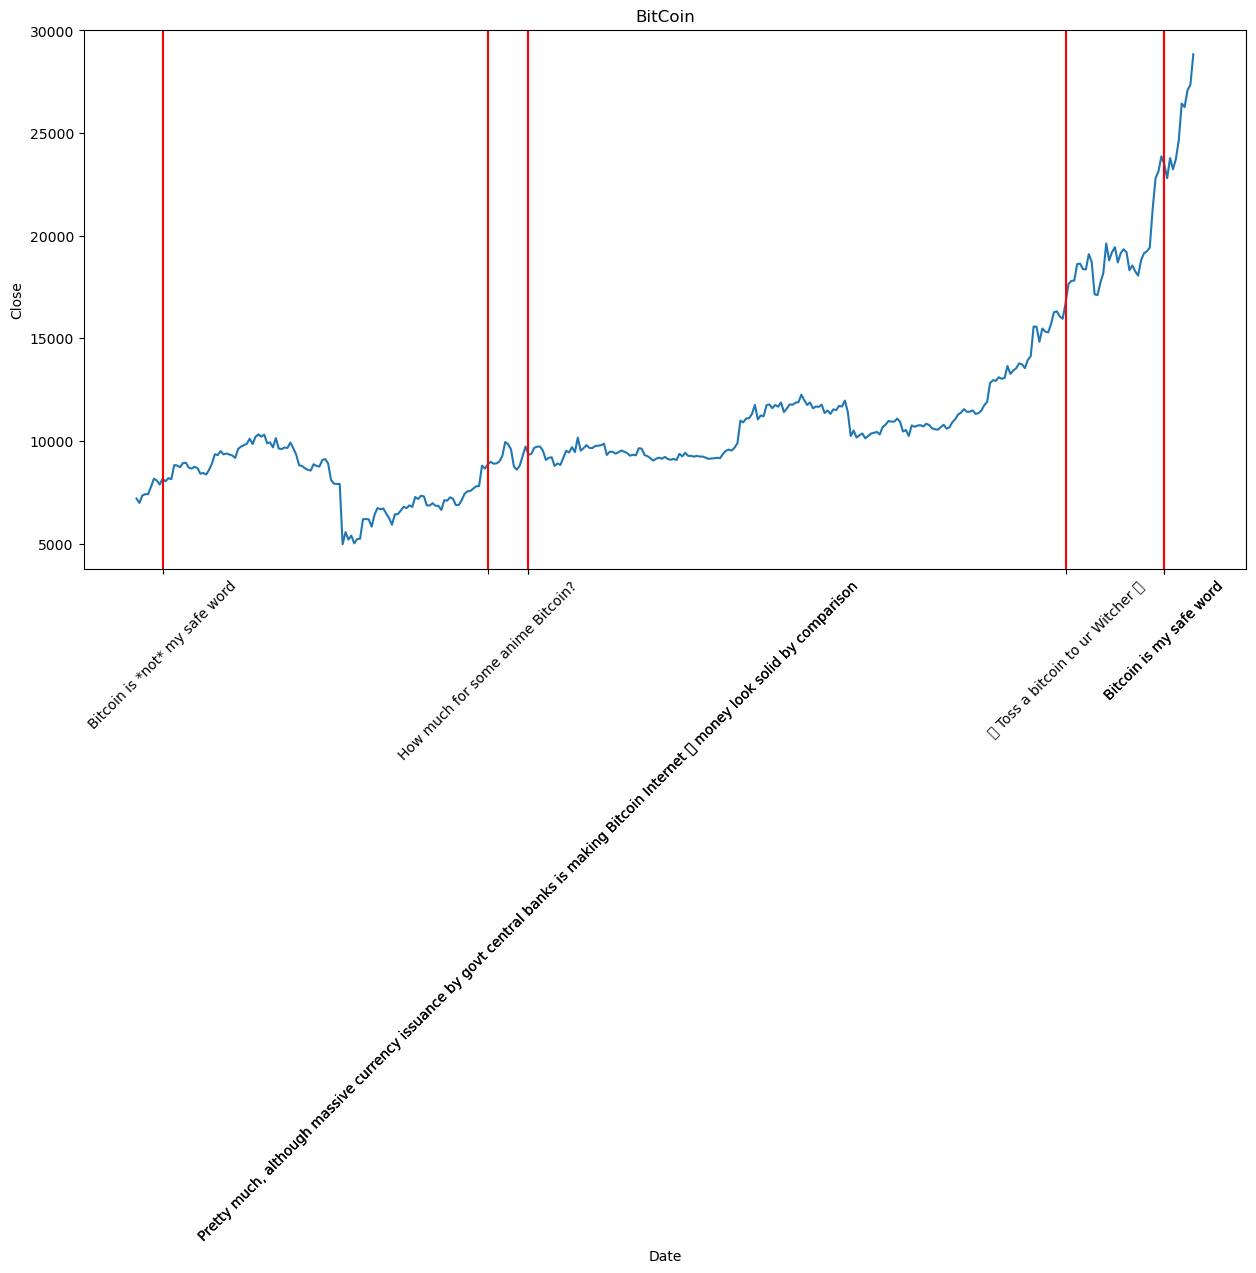

In [21]:
plt.figure(figsize=(15, 7))
ax = sns.lineplot(x = Bit2020.Date, y = Bit2020.Close)


for i in BitElon2020.Date:
    x = pd.Timestamp(i)
    plt.axvline(x,color='r')

ax.set_xticks(BitElon2020.Date) 
ax.set_xticklabels(BitElon2020.Tweet, rotation=45)

ax.set_title("BitCoin")


**It is clear that Elon Musk has had a massive effect on BitCoin as with every tweet there is a resulting increase in the trading price.**